given points: [(5, 3), (6, 5), (7, 3), (8, 5), (3, 3), (9, 5), (6, 7), (7, 0)]


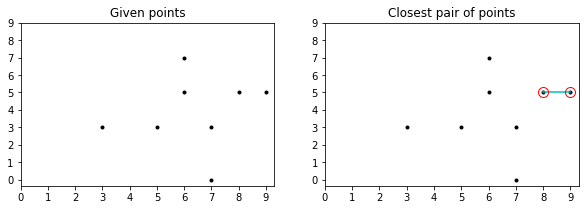

closest pair of points:  [(8, 5), (9, 5)]
The smallest distance is 1.0


In [1]:
import math
import matplotlib.pyplot as plt
from random import *

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


def compareX(a, b):
    p1 = a
    p2 = b
    return (p1.x - p2.x)


def compareY(a, b):
    p1 = a
    p2 = b
    return (p1.y - p2.y)


def dist(p1, p2):
    return math.sqrt((p1.x - p2.x)*(p1.x - p2.x) + (p1.y - p2.y)*(p1.y - p2.y))

a=[]
def bruteForce(P, n):
    min_dist = float("inf")
    for i in range(n):
        for j in range(i+1, n):
            if dist(P[i], P[j]) < min_dist:
                min_dist = dist(P[i], P[j])
                a = [P[i],P[j]]
    return min_dist, a


def min(x, y):
    return x if x < y else y

e = 0
def stripClosest(strip, size, d):
    global e
    min_dist = d
    strip = sorted(strip, key=lambda point: point.y)

    for i in range(size):
        for j in range(i+1, size):
            if (strip[j].y - strip[i].y) >= min_dist:
                break
            if dist(strip[i], strip[j]) < min_dist:
                min_dist = dist(strip[i], strip[j])
                e =[strip[i], strip[j]]
    return min_dist,e


def closestUtil(P, n):
    if n <= 3:
        min_dist, a = bruteForce(P, n)
        return min_dist, a
    mid = n//2
    midPoint = P[mid]
    dl, a1 = closestUtil(P, mid)
    dr, a2 = closestUtil(P[mid:], n - mid)
    d = min(dl, dr)
    if d == dl:
        pnt = a1
    else:
        pnt = a2
        
    strip = []
    for i in range(n):
        if abs(P[i].x - midPoint.x) < d:
            strip.append(P[i])
    min_dist, e2 = stripClosest(strip, len(strip), d)
    minimum_distance = min(d, min_dist)
    if minimum_distance == d:
        pnt2 = pnt
    else:
        pnt2 = e2
    return minimum_distance, pnt2


def closest(P, n):
    P = sorted(P, key=lambda point: point.x)
    return closestUtil(P, n)



input_points = []

while len(input_points) < 8:
    rand = (randint(0, 10), randint(0,10))
    if rand not in input_points:
        input_points.append(rand)
print("given points:", input_points)
#print(input_points)
points = []
for point in input_points:
    points.append(Point(point[0], point[1]))
n = len(points)

min_distance, closest_points = closest(points, n)
pnt_final = [(int(closest_points[0].x), int(closest_points[0].y)),(int(closest_points[1].x), int(closest_points[1].y)) ]

x = []
y = []
for point in input_points:
    x.append(point[0])
    y.append(point[1])
    
x1 = []
y1 = []
for p in pnt_final:
    x1.append(p[0])
    y1.append(p[1])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
for ax in (ax1, ax2):
    ax.plot(x, y, '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Closest pair of points')
        
        ax.plot(x1, y1 , 'c')
        ax.plot(x1, y1, 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
    
plt.show()
#if __name__ == "__main__":

min_distance, closest_points = closest(points, n)
pnt_final = [(int(closest_points[0].x), int(closest_points[0].y)),(int(closest_points[1].x), int(closest_points[1].y)) ]
print("closest pair of points: ",pnt_final)
print("The smallest distance is", min_distance)